In [1]:
import matplotlib.pyplot as plt
import numpy as np

import json
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

In [2]:
def calculate_bleu_score(reference_texts, poisoned_answer):
    smoothie = SmoothingFunction().method1
    score = sentence_bleu(reference_texts.split(), poisoned_answer.split(), weights=(0.5, 0.5, 0, 0), smoothing_function=smoothie)
    return score

In [3]:
def plot_benign_set(BENIGN_SET):
    # Separate keys and values
    keys = list(BENIGN_SET.keys())
    values = list(BENIGN_SET.values())
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(keys, values, width=0.5)
    
    # Add labels, title, and grid
    plt.xlabel("Benign set size", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.title("Number of Benign Set", fontsize=14)
    plt.xticks(keys)  # Ensure all keys are displayed as x-ticks
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Display the plot
    plt.show()

In [4]:
def spline_BLEU(custom_title, samples, BLEU_poisoned, BLEU_Truth):
    samples = np.arange(1, samples+1)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(samples, BLEU_poisoned, label='BLEU Poisoned', marker='o')
    plt.plot(samples, BLEU_truth, label='BLEU Truth', marker='x')
    
    # Add labels, title, and legend
    plt.xlabel('Sample Index')
    plt.ylabel('BLEU Score')
    plt.title(f'{custom_title}, Comparison of BLEU Scores (Poisoned vs Truth)')
    plt.legend()
    
    # Show grid for better readability
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Display the plot
    plt.show()

In [5]:
def histo_BLEU(custom_title, samples, BLEU_poisoned, BLEU_Truth):
    # Number of bins
    bins = 15
    
    # Calculate histogram data
    poisoned_hist, edges = np.histogram(BLEU_poisoned, bins=bins, range=(0, max(max(BLEU_poisoned),max(BLEU_Truth))))
    truth_hist, _ = np.histogram(BLEU_truth, bins=bins, range=(0, max(max(BLEU_poisoned),max(BLEU_Truth))))
    
    # Define bin positions
    bin_centers = (edges[:-1] + edges[1:]) / 2
    width = (edges[1] - edges[0]) / 3  # Width for bars
    
    # Plot bar charts side by side
    plt.figure(figsize=(10, 6))
    plt.bar(bin_centers - width / 2, poisoned_hist, width=width, label='BLEU Poisoned', color='blue', alpha=0.7)
    plt.bar(bin_centers + width / 2, truth_hist, width=width, label='BLEU Truth', color='orange', alpha=0.7)

    # # Plotting
    # plt.figure(figsize=(10, 6))
    # plt.hist(BLEU_poisoned, bins=15, alpha=0.7, label='BLEU Poisoned', color='blue')
    # plt.hist(BLEU_truth, bins=15, alpha=0.7, label='BLEU Truth', color='orange')
    
    # Add labels, title, and legend
    plt.xlabel('BLEU Score')
    plt.ylabel('Frequency')
    plt.title(f'Given {samples} questions {custom_title}, Comparison of BLEU Scores (Poisoned vs Truth)')
    plt.legend()
    
    # Show grid for better readability
    plt.grid(True, alpha=0.6)
    
    # Display the plot
    plt.show()

In [6]:
# BLEU score evaluation
datasets = ['fiqa']
for name in datasets:
    with open(f"results/query_results/main/{name}-contriever-llama7b-Top5--M10x4-adv-LM_targeted-dot-5-5.json", "r") as f:
        result = json.loads(f.read())
        BLEU_poisoned = []
        BLEU_truth = []
        BLEU_ground = []
        IDs = []
        BENIGN_SET = {}
        for indx, i in enumerate(result):
            poisoned_rate = 0
            for k in i.keys():
                for query in i[k]:
                    # print(query['output_poison'], query['incorrect_answer'], query['answer'])
                    if query['benign_size'] not in BENIGN_SET:
                        BENIGN_SET[query['benign_size']] = 0
                    BENIGN_SET[query['benign_size']] = BENIGN_SET[query['benign_size']] + 1
                    IDs.append(query['id'])
                    BLEU_poisoned.append(calculate_bleu_score(query['incorrect_answer'], query['output_poison']))
                    BLEU_truth.append(calculate_bleu_score(query['answer'], query['output_poison']))
                    BLEU_ground.append(calculate_bleu_score(query['answer'], query['incorrect_answer']))
                    # print(f"{query['id']} {BLEU_poisoned[-1]} {BLEU_truth[-1]} {BLEU_poisoned[-1] == BLEU_truth[-1]}")

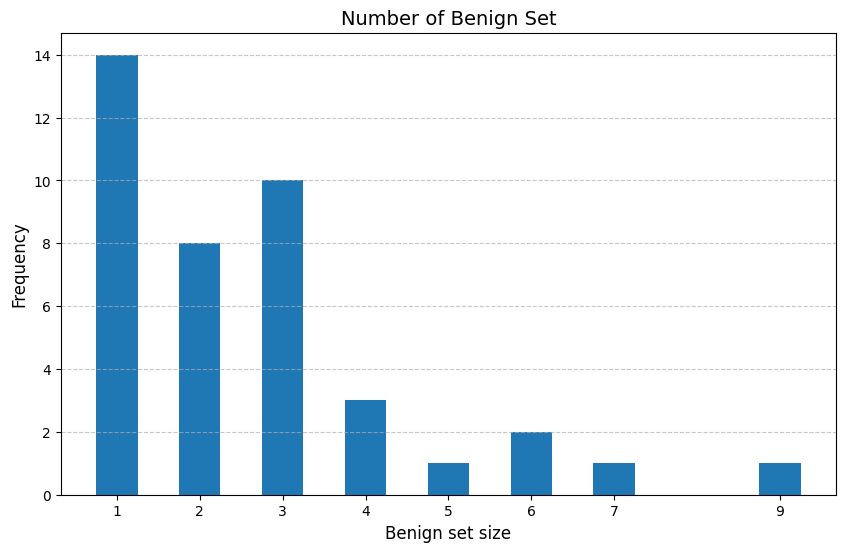

In [7]:
plot_benign_set(BENIGN_SET)

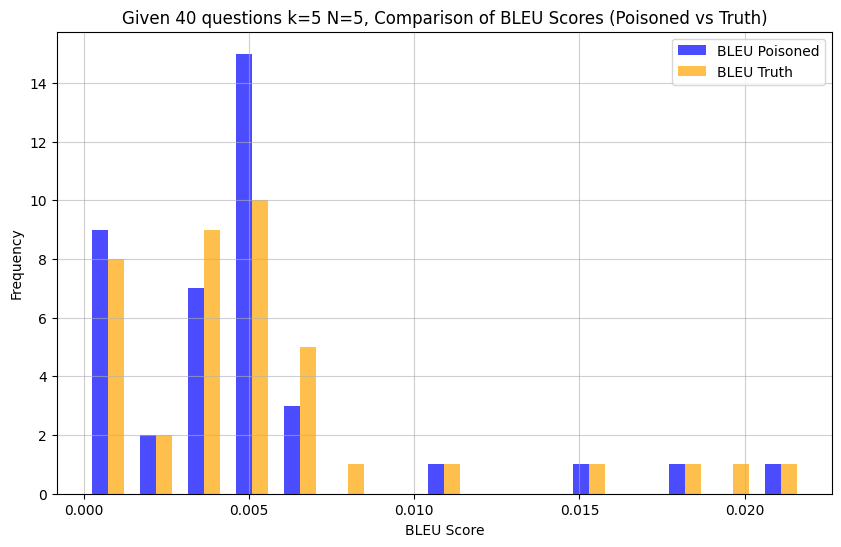

In [8]:
histo_BLEU('k=5 N=5', 40, BLEU_poisoned, BLEU_truth)

In [9]:
# BLEU score evaluation
datasets = ['fiqa']
for name in datasets:
    with open(f"results/query_results/main/{name}-contriever-llama7b-Top5--M5x5-adv-LM_targeted-dot-5-5.json", "r") as f:
        result = json.loads(f.read())
        BLEU_poisoned = []
        BLEU_truth = []
        BLEU_ground = []
        IDs = []
        BENIGN_SET = {}
        for indx, i in enumerate(result):
            poisoned_rate = 0
            for k in i.keys():
                for query in i[k]:
                    # print(query['output_poison'], query['incorrect_answer'], query['answer'])
                    if query['benign_size'] not in BENIGN_SET:
                        BENIGN_SET[query['benign_size']] = 0
                    BENIGN_SET[query['benign_size']] = BENIGN_SET[query['benign_size']] + 1
                    IDs.append(query['id'])
                    BLEU_poisoned.append(calculate_bleu_score(query['incorrect_answer'], query['output_poison']))
                    BLEU_truth.append(calculate_bleu_score(query['answer'], query['output_poison']))
                    BLEU_ground.append(calculate_bleu_score(query['answer'], query['incorrect_answer']))
                    # print(f"{query['id']} {BLEU_poisoned[-1]} {BLEU_truth[-1]} {BLEU_poisoned[-1] == BLEU_truth[-1]}")

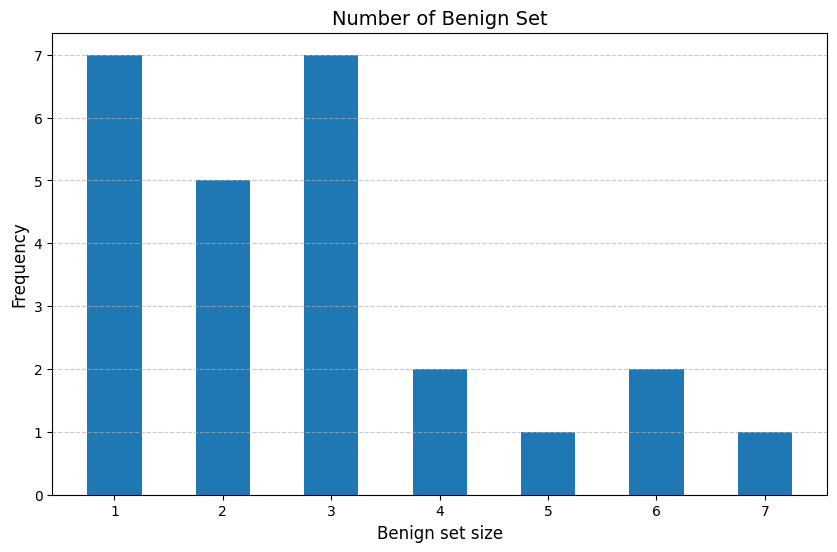

In [10]:
plot_benign_set(BENIGN_SET)

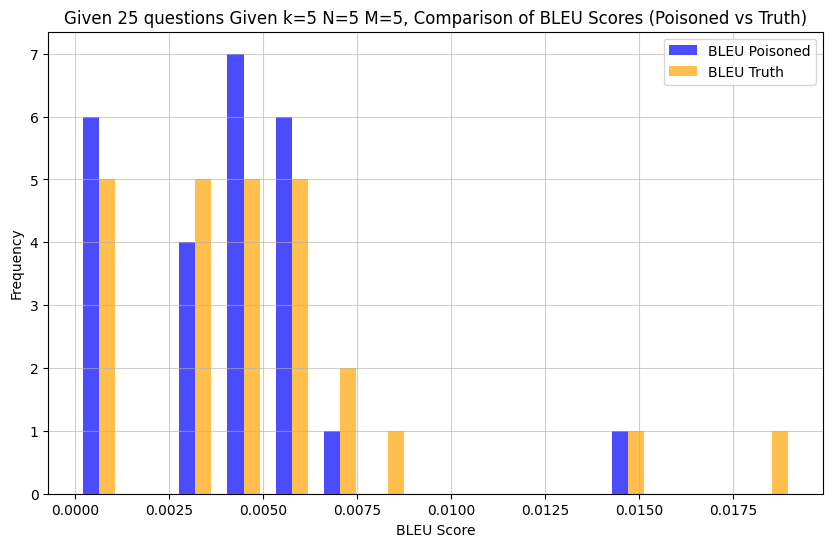

In [11]:
histo_BLEU('Given k=5 N=5 M=5', 25, BLEU_poisoned, BLEU_truth)

In [12]:
# BLEU score evaluation
datasets = ['fiqa']
for name in datasets:
    with open(f"results/query_results/main/{name}-contriever-llama7b-Top5--M10x4-adv-LM_targeted-dot-2-5.json", "r") as f:
        result = json.loads(f.read())
        BLEU_poisoned = []
        BLEU_truth = []
        BLEU_ground = []
        IDs = []
        BENIGN_SET = {}
        for indx, i in enumerate(result):
            poisoned_rate = 0
            for k in i.keys():
                for query in i[k]:
                    # print(query['output_poison'], query['incorrect_answer'], query['answer'])
                    if query['benign_size'] not in BENIGN_SET:
                        BENIGN_SET[query['benign_size']] = 0
                    BENIGN_SET[query['benign_size']] = BENIGN_SET[query['benign_size']] + 1
                    IDs.append(query['id'])
                    BLEU_poisoned.append(calculate_bleu_score(query['incorrect_answer'], query['output_poison']))
                    BLEU_truth.append(calculate_bleu_score(query['answer'], query['output_poison']))
                    BLEU_ground.append(calculate_bleu_score(query['answer'], query['incorrect_answer']))
                    # print(f"{query['id']} {BLEU_poisoned[-1]} {BLEU_truth[-1]} {BLEU_poisoned[-1] == BLEU_truth[-1]}")

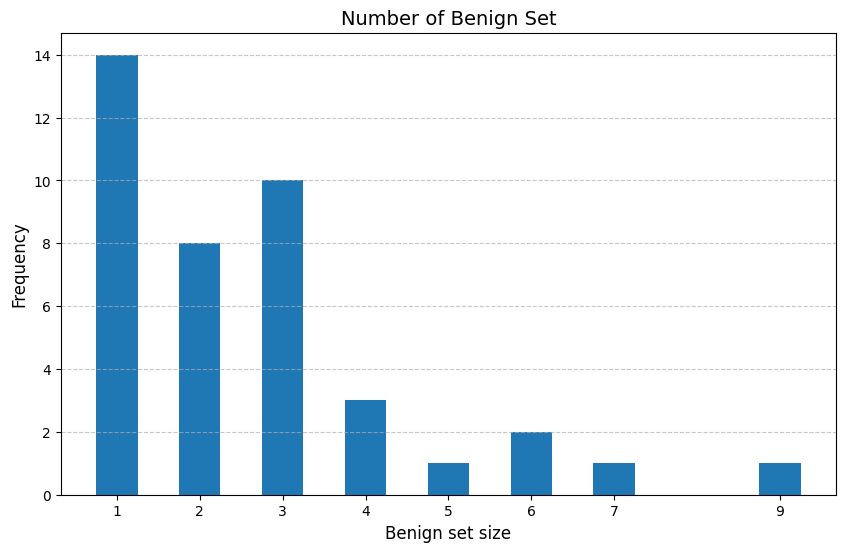

In [13]:
plot_benign_set(BENIGN_SET)

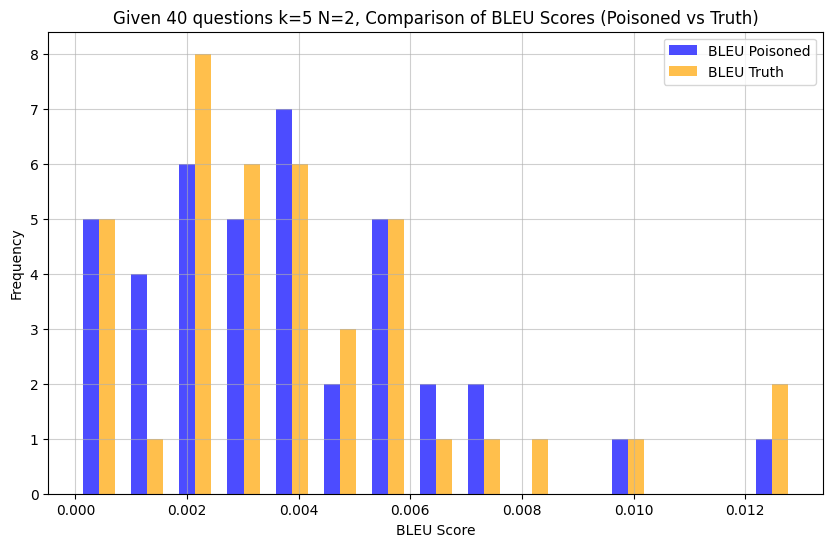

In [14]:
histo_BLEU('k=5 N=2', 40, BLEU_poisoned, BLEU_truth)

In [15]:
# BLEU score evaluation
datasets = ['fiqa']
for name in datasets:
    with open(f"results/query_results/main/{name}-contriever-llama7b-Top5--M10x4-adv-LM_targeted-dot-1-5.json", "r") as f:
        result = json.loads(f.read())
        BLEU_poisoned = []
        BLEU_truth = []
        BLEU_ground = []
        IDs = []
        BENIGN_SET = {}
        for indx, i in enumerate(result):
            poisoned_rate = 0
            for k in i.keys():
                for query in i[k]:
                    # print(query['output_poison'], query['incorrect_answer'], query['answer'])
                    if query['benign_size'] not in BENIGN_SET:
                        BENIGN_SET[query['benign_size']] = 0
                    BENIGN_SET[query['benign_size']] = BENIGN_SET[query['benign_size']] + 1
                    IDs.append(query['id'])
                    BLEU_poisoned.append(calculate_bleu_score(query['incorrect_answer'], query['output_poison']))
                    BLEU_truth.append(calculate_bleu_score(query['answer'], query['output_poison']))
                    BLEU_ground.append(calculate_bleu_score(query['answer'], query['incorrect_answer']))
                    # print(f"{query['id']} {BLEU_poisoned[-1]} {BLEU_truth[-1]} {BLEU_poisoned[-1] == BLEU_truth[-1]}")

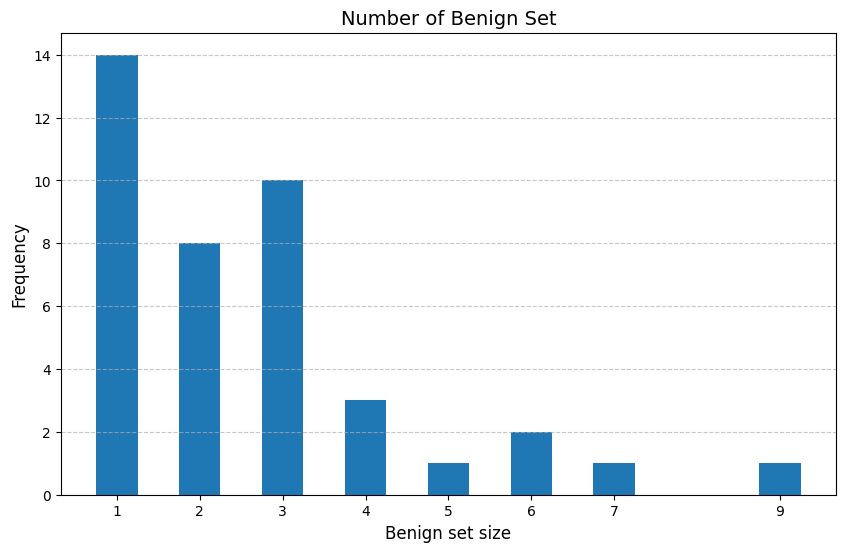

In [16]:
plot_benign_set(BENIGN_SET)

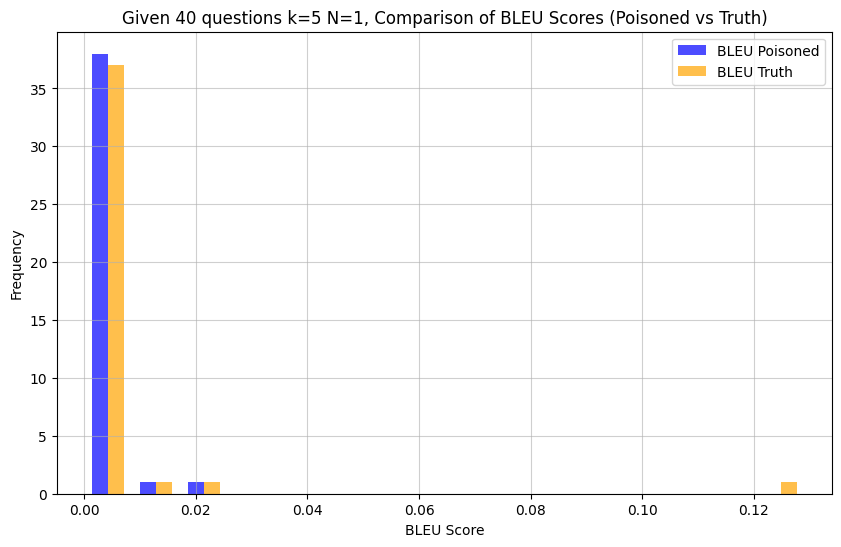

In [18]:
histo_BLEU('k=5 N=1', 40, BLEU_poisoned, BLEU_truth)